# Introduction to Scikit-Learn (sklearn)
This notebook demonstrates some of the most useful functions of the Scikit-Learn library.

Topics:



In [187]:
covering = [
    "0. end to end workflow",
    "1. getting the data ready",
    "2. choosing the right estimator / algorithm",
    "3. fitting the model (training)",
    "4. evaluating the model",
    "5. improving the model",
    "6. save and load a trained model",
    "7. putting it all together"
]
covering

['0. end to end workflow',
 '1. getting the data ready',
 '2. choosing the right estimator / algorithm',
 '3. fitting the model (training)',
 '4. evaluating the model',
 '5. improving the model',
 '6. save and load a trained model',
 '7. putting it all together']

In [188]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Getting the Data Ready

#### Three main things to do:
1. Split the data into features and labels (usually 'X' & 'y')
2. Filling (imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (feature encoding)

In [189]:
heart = pd.read_csv("../data/heart-disease.csv")
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [190]:
# splitting the data to X and y
# X represents the data to train on 
# y represents the expected results to train with
X = heart.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [191]:
y = heart["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [192]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [193]:
# rows vs columns, original vs train set vs test set
X.shape, X_train.shape, X_test.shape

((303, 13), (242, 13), (61, 13))

### 1.1 Converting Data to all Numerical

All data must be numerical for the machine to understand. For the following example, we will convert the car_sales data to show "Make", "Colour", and "Doors" to be numerical values.

In [194]:
cars = pd.read_csv("../data/car-sales-extended.csv")
cars.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [195]:
cars.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [196]:
# The goal is to have each value in the column assigned a numerical
# value that the machine can understand

# start by splitting
X = cars.drop("Price", axis=1)
y = cars["Price"]

X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


#### Converting to Numerical and Viewing

In [197]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
# note: doors are also considered catagorical, even tho they are
# already numerical, bc there are only three options for "Doors"

one_hot = OneHotEncoder()

# take the one_hot and apply it to the categorical_features
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                # ignore all the other columns
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X



array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [198]:
# looking at the below dataframe, we can see that:
# 4 "Makes" of cars
# 5 "Colours" of cars
# 3 "Doors" categories for cars

# Total of twelve. Each numbered column below represents one of these
# types of data, eg: col 0 is whether a car's "Make" is "BMW",
# '0' for 'no', '1', for 'yes'

transformed_X_df = pd.DataFrame(transformed_X)
transformed_X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [199]:
cars["Make"].unique(),cars["Colour"].unique(),cars["Doors"].unique()

(array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object),
 array(['White', 'Blue', 'Red', 'Green', 'Black'], dtype=object),
 array([4, 5, 3], dtype=int64))

In [200]:
len(cars["Make"].unique()), len(cars["Colour"].unique()), len(cars["Doors"].unique())

(4, 5, 3)

In [201]:
# Another way to view it, in the original dataframe without making
# changes
dummies = pd.get_dummies(cars[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


#### Fitting the Model

In [202]:
# build the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)
# train and test split
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
# train the model to learn the relationship between X and y data
model.fit(X_train, y_train)

RandomForestRegressor()

In [203]:
# score the model with a test
model.score(X_test, y_test)

0.3235867221569877

In [204]:
# Conclusion:
# the model worked; however, trying to predict a car's price
# based on the limited information in the table is likely not possible

# 32.35% success on the test is pretty dismal.


### 1.2 Handling Missing Values

**Options**
1. Fill with some value (imputation)
2. Remove the samples with missing values



In [205]:
# import a data set to work with
cars_m = pd.read_csv("../data/car-sales-extended-missing-data.csv")
cars_m.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [206]:
cars_m.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Using Pandas for Missing Values

In [207]:
# fill NaN values within feature columns
cars_m["Make"].fillna("missing", inplace=True)

cars_m["Colour"].fillna("missing", inplace=True)

cars_m["Odometer (KM)"].fillna(cars_m["Odometer (KM)"].mean(), inplace=True)

cars_m["Doors"].fillna(4, inplace=True)

In [208]:
cars_m.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [209]:
# Price is our target column, so we'll just remove the rows that have
# missing Price values
cars_m.dropna(inplace=True)
cars_m.isna().sum(), len(cars_m)

(Make             0
 Colour           0
 Odometer (KM)    0
 Doors            0
 Price            0
 dtype: int64,
 950)

In [210]:
X = cars_m.drop("Price", axis = 1)
y = cars_m["Price"]

X["Make"].unique(), X["Colour"].unique(), X["Doors"].unique()

(array(['Honda', 'BMW', 'Toyota', 'Nissan', 'missing'], dtype=object),
 array(['White', 'Blue', 'Red', 'Green', 'missing', 'Black'], dtype=object),
 array([4., 5., 3.]))

In [211]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [212]:
# turn categories into numbers
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

# NOTE: this saves the large object into a 'sparse matrix', which is a condensed
# type of array...

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [213]:
# trying to view the data gives the following...
transformed_X_df = pd.DataFrame(transformed_X)
transformed_X_df.head()

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."


In [214]:
# to view the actual data as a dataFrame similar to way above,
# use the '.toarray()' on the compressed array
transformed_X_df = pd.DataFrame(transformed_X.toarray())
transformed_X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [215]:
# show the total amount of columns in the dataframe
print(list(transformed_X_df))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


#### Use SciKit Learn to fill missing data values

In [216]:
# NOTE: it's best to fill and transform training and test 
# sets separately

cars_m = pd.read_csv("../data/car-sales-extended-missing-data.csv")
cars_m.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [217]:
cars_m.dropna(subset=["Price"], inplace=True)
cars_m.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [218]:
# Split into X and y
X = cars_m.drop("Price", axis=1)
y = cars_m["Price"]

In [219]:
# fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill catagorical values with 'missing' and numerical values with
# mean()

# if 'strategy' is 'constant', then a 'fill_value' needs to be supplied
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columnes
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create imputer (fills in missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [220]:
# re-adding the column heads to the df
cars_m_filled = pd.DataFrame(filled_X,
                            columns=["Make","Colour",
                                     "Doors","Odometer (KM)"])
cars_m_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [221]:
# checking
cars_m_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [222]:
# turn categories into numbers
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(cars_m_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [223]:
pd.DataFrame(transformed_X.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [224]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [225]:
# sample difference can account for difference in scores
len(cars), len(cars_m)

(1000, 950)

## 2. Choosing the Right Model

Somethings to note:

* sklearn refers to 'machine learning models' and 'algorithms' as 'estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes we will see `clf` for classification model
* Regression problem - predicting a number (selling price)

<img src="../img/ml_map.png" />

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for regression

Practice datasets:
    https://scikit-learn.org/stable/datasets/toy_dataset.html

        

#### Import from the sklearn datasets

In [226]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

#### Convert the import into a dataframe

In [227]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [228]:
housing_df["MedHouseVal"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [229]:
# With this dataset, we want to try to predict the MedHouseVal
# According to the flow chart above, we should be in the 'regression'
# bubble with <100k samples, but beyond that we're not sure
# So, we can experiment a bit

from sklearn.linear_model import Ridge


X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"] # median house price in $100,000's

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model
model = Ridge()
model.fit(X_train, y_train)

# check score on test set
model.score(X_test, y_test) # returns 'coefficient of determination'
# i.e. how predicitive are the features on the target value?
# how to improve?
# add more data, or
# try a different model

0.6017138339794649

In [230]:
# trying another model(s)

from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"] # median house price in $100,000's

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model = LassoLars()
# model = Lasso()
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_train, y_train)

0.609291943415689

#### Trying a different model

Ensemble model, a combination of smaller model to try and make better predictions that one single model.

"Random Forest" is a decision tree model made of lots of different decision trees.

https://willkoehrsen.github.io/data%20science/machine%20learning/random-forest-simple-explanation/

In [231]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
r = np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


model.score(X_test, y_test)
# NOTE: this takes about two minutes to complete

0.8065734772187598

### 2.2 Classification Model

In [232]:
# for this we'll use our heart disease dataframe, 'heart'
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [233]:
# The 'map' says to try LinearSVC

from sklearn.svm import LinearSVC
np.random.seed(42)
X = heart.drop("target", axis=1)
y = heart["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(dual=True, max_iter=2100)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

# NOTE: just as with all models, 'tuning' can have a positive effect
# on the results. In this case, 2100 iterations was found to be the
# best number, with higher or lower numbers resulting in a much
# lower score.

C:\Users\Lawrence\Git Repos\Python Scripts\Machine_Learning\sample_project_01\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [234]:
# Trying another model to circumvent the error above
# RandomForestClassifier may work here...

from sklearn.ensemble import RandomForestClassifier
r = np.random.seed(42)

X = heart.drop("target", axis=1)
y = heart["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)
# NOTE: this can take about two minutes to complete during first run



0.8524590163934426

# 3. Fitting the Model / Predicting

Fitting a model means to train it.
When a model is 'fit' the X_train data is looked at for patterns that lead to the corresponding 'target' data. These patterns are then tested in the 'score' function.

## 3.1 Predictions with the Trained Model 

### `predict()` versus `predict_proba()`

In [235]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

`predict_proba()` returns probabilities of a classification label

In [236]:
# notice the second array returns two values per row
# these values are the probability for each value option 
# at that location
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [237]:
clf.predict(X_test[:5]) # actual values predicted

array([0, 1, 1, 0, 1], dtype=int64)

In [238]:
y_preds = clf.predict(X_test[:5])
y_probs = clf.predict_proba(X_test[:5])
col = ["0 prob", "1 prob"]
a = pd.DataFrame(data=y_probs,columns=col)
a["true"] = y_preds
a

,0 prob,1 prob,true
0,0.89,0.11,0
1,0.49,0.51,1
2,0.43,0.57,1
3,0.84,0.16,0
4,0.18,0.82,1


Predict can also be used for regression models (like our housing)


In [239]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [240]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= housing_df.drop("MedHouseVal",axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [241]:
np.array(y_preds[:10])

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [242]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [243]:
# comparing the above two arrays for correctness
# 'mean absolute error' is the average difference betweent the predicted
# values and the true values

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

On average, each prediciton is the above amount different from
the actual value in the test data

# 4. Evaluating a machine learning model

Three main ways to evaluate with Scikit-Learn
1. Estimators built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

more info: https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Evaluating with `score()` method

In [244]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart.drop("target", axis=1)
y = heart["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=500)

clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500)

In [245]:
clf.score(X_train, y_train),clf.score(X_test, y_test)

(1.0, 0.8688524590163934)

In [246]:
# a perfect score on training data is expected
# a perfect score on test data should be looked at with skepticism

### Regression Scoring

In [247]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= housing_df.drop("MedHouseVal",axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators=1500)

model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9746723719199266, 0.8084744997704398)

## 4.2 Evaluating using `scoring` parameter

Is the model actually working? Is it good for predicting on future data?


In [248]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart.drop("target", axis=1)
y = heart["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [249]:
clf.score(X_test, y_test)

0.8524590163934426

In [250]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [251]:
'''
what is cross-validation? 

cv=5 refers to the splits in the data to test and train
in this case, 5 different versions of the model are trained and 
then tested. This means the data is split according to the test_size
parameter 5 times, instead of just once, and each time it is split the 
split is slightly different (uses different splits of the data for test
and train).

The above results represent the five scores from the five splits

cv can be changed to whatever number is desired
'''

'\nwhat is cross-validation? \n\ncv=5 refers to the splits in the data to test and train\nin this case, 5 different versions of the model are trained and \nthen tested. This means the data is split according to the test_size\nparameter 5 times, instead of just once, and each time it is split the \nsplit is slightly different (uses different splits of the data for test\nand train).\n\nThe above results represent the five scores from the five splits\n\ncv can be changed to whatever number is desired\n'

In [252]:
# compare the two scores below
np.random.seed(42)
clf_single = clf.score(X_test, y_test)

clf_cross = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single, clf_cross

(0.8524590163934426, 0.8248087431693989)

In [253]:
# Default scoring parameter of classifier = mean accuracy

In [254]:
# scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

**Accuracy:**
Can be represented by the mean of all scores from the cross-value score

In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart.drop("target", axis=1)
y = heart["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
cv_score = cross_val_score(clf, X, y, cv=5)
cv_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [256]:
np.mean(cv_score)

0.811639344262295

In [257]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cv_score) *100:.2f}%")


Heart Disease Classifier Cross-Validated Accuracy: 81.16%


**Area Under ROC Curve:**
(ROC = receiver operating characteristic)
Comparison of a model's true positive rate (TPR) versus th models false positive rate (FPR)
* TPR = model predicts '1' when truth is '1'
* FPR = model predicts '1' when truth is '0'
* True negative = model predicts '0' when truth is '0'
* False negative = model predicts '0' when truth is '1'

In [258]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

# make predictions with probabilities

y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.91, 0.09],
        [0.48, 0.52],
        [0.44, 0.56],
        [0.78, 0.22],
        [0.29, 0.71],
        [0.17, 0.83],
        [0.23, 0.77],
        [0.94, 0.06],
        [0.96, 0.04],
        [0.43, 0.57]]),
 61)

In [259]:
# slice to take the 'positive' ('1') column of above data (right side)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.09, 0.52, 0.56, 0.22, 0.71, 0.83, 0.77, 0.06, 0.04, 0.57])

In [260]:
# calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.10344828, 0.13793103, 0.13793103, 0.17241379, 0.20689655,
       0.20689655, 0.27586207, 0.34482759, 0.55172414, 0.5862069 ,
       0.65517241, 0.72413793, 0.79310345, 0.86206897, 0.96551724,
       1.        ])

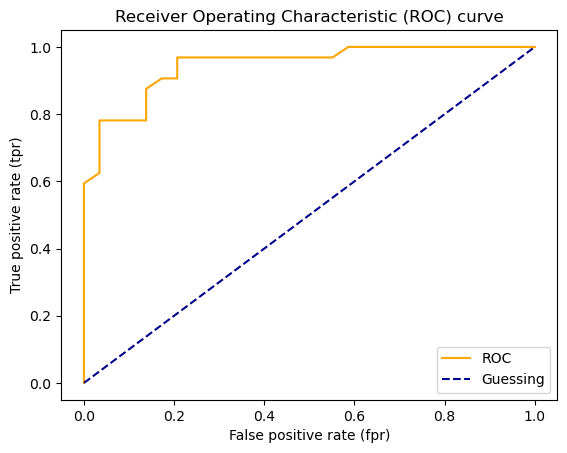

In [261]:
# create a function for plotting our ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots the ROC curve given the false postive rate and 
    true positive rate of a model'''
    # plot curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [262]:
# calculate the area under curve (auc) of the roc curve
# yellow line above represents the ROC versus the blue line of just
# 'guessing'. The higher above 'guessing' the curve is, the better
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9455818965517241

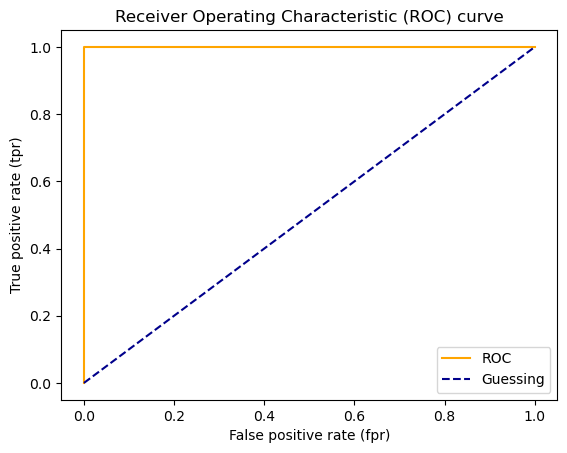

In [263]:
# what is a perfect ROC curve and AUC score?
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [264]:
roc_auc_score(y_test, y_test)

1.0

More info here: https://www.youtube.com/watch?v=4jRBRDbJemM

Docs: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Calculation: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc


**Confusion Matrix**

A quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In esence, giving you an idea of where the model is getting cofused.

In [265]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [266]:
# visualize the confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,3,29


In [268]:
len(y_preds), (24 + 5 + 3 + 29), len(X_test)

(61, 61, 61)

### Installing a module from Jupyter Notebook

In [277]:
import sys
!conda install --yes --prefix {"../env"} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Lawrence\Git Repos\Python Scripts\Machine_Learning\sample_project_01\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py310haa95532_0         492 KB
    ------------------------------------------------------------
                                           Total:         492 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.2-py310haa95532_0 




seaborn-0.12.2       | 492 KB    |            |   0% 
seaborn-0.12.2       | 492 KB    | 3          |   3% 
seaborn-0.12.2       | 492 KB    | ########## | 100% 
seaborn-0.12.2       | 492 KB    | ########## | 100% 
                                                     


Preparing transaction: ...working... done
Verifying trans



==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3




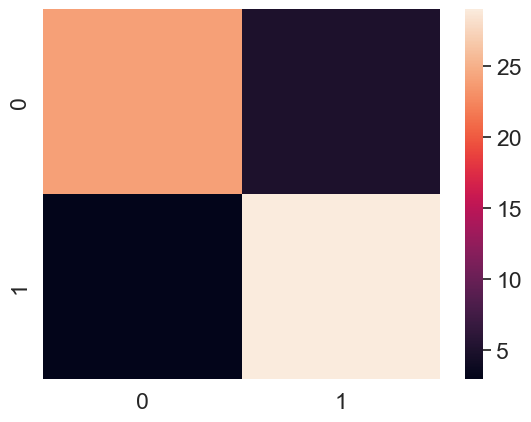

In [278]:
# According to the above crosstab, we have 5 false positives, and 
# 3 false negatives
# 
# Out of 61 total tests our model got (24 + 29) = 53 correect

# Use seaborn.heatmap to make the visual better
import seaborn as sns
sns.set(font_scale=1.5)

# create the matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot with seaborn
sns.heatmap(conf_mat);

**Confusion Matrix from Sklearn**

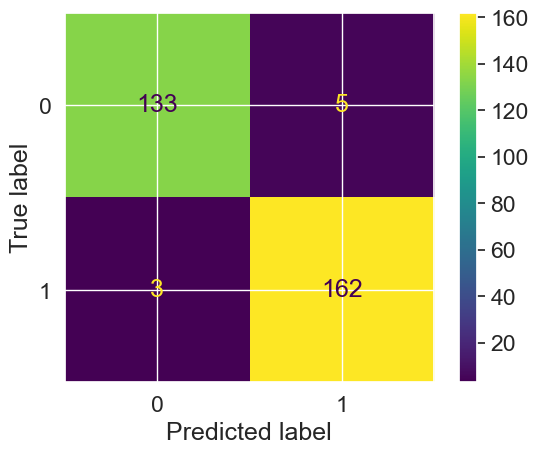

In [280]:
# automatic, without making predictions first
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

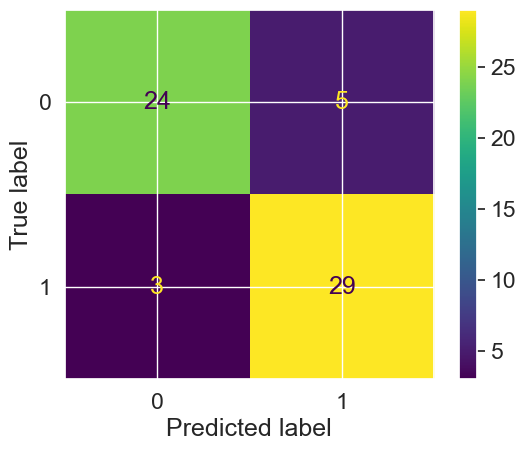

In [283]:
# using our predictions from before (y_preds)
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                       y_pred=y_preds);

**Classification Report**




In [285]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [286]:
# Precision: indicates the proporation of positive identifications 
# which were actuall correct

# Recall: indicates the propritoin of actual positives which were
# correctly scored

# F1: a combination of precision and recall

# Support: the amount of samples the given metric was calculated on

# Accuracy: the accuracy in decimal form

# Macro: the average precision, recall, and F1 score between classes

# Weighted: weighted average precision, recall, and F1 score between
# classs. This metric will favor the majority class (class that has
# more samples)


In [287]:
# Where precision and recall become valuable
dis = np.zeros(10000)
dis[0] = 1 # only one positive case

dis_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(dis,
                                  dis_preds,
                                  output_dict=True))

C:\Users\Lawrence\Git Repos\Python Scripts\Machine_Learning\sample_project_01\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lawrence\Git Repos\Python Scripts\Machine_Learning\sample_project_01\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lawrence\Git Repos\Python Scripts\Machine_Learning\sample_project_01\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samp

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [288]:
# the accuracy of this hypothetical model is 99.999%, but is this
# model worth it?

# prcision is 0, though, because it missed the 1 case it should have
# found

# looking at support shows that there was only 1 '1' to find, hinting
# at how difficult the training for the model may have been

# in this case, more '1' samples may be needed to train the model 
# better.

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. the same amount of samples which are labeled with '0' or '1'
* **Precision** and **recall** become more important when classes are imbalanced
* If false positive predicitions are worse than false negatives, aim for higher precision
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

1. R^2 (r-squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)



In [295]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)



RandomForestRegressor()

In [296]:
model.score(X_test, y_test)

0.8065734772187598

**R^2** How much of the dependent variable can be predicted by the independent variables

R^2 Compares your models predictions to the means of th targets. Values can range from negative infinity (very poor) to '1'. For example, if all the model does is predict the mean of the targets, its R^2 value would be '0' (see below for example). If the model perfectly predicts a range of numbers, its R^2 value would approach or be '1'.

In [300]:
from sklearn.metrics import r2_score

# create a hypothetical full array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10:]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [303]:
y_test[:10]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: MedHouseVal, dtype: float64

In [301]:
# score of '0.0' is bad, cannot predict anything correctly
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [302]:
# score of '1.1' is 'perfect score' which can also be bad
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**MAE** Mean Absoloute Error - The average of the absolute differences between predictions and actual values. It gives an idea of how wrong your models predictions are.

In [309]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

On average, the values in `y_preds` are each 0.326... +/- the values in `y_test`

In [311]:
# visualize in a dataframe
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [314]:
# calculate the mae by hand (don't forget to remove negatives)
mae_t = np.abs(df["differences"]).mean()
mae_t

0.32659871732073664

In [315]:
mae, mae_t

(0.32659871732073664, 0.32659871732073664)

**MSE** Mean Squared Error - th mean of the square of the errors between actual and predicted values. This will amplify the errors that are high.

In [316]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [317]:
# let's visualize
df["squared_diff"] = np.square(df["differences"])
df.head(5)

,actual values,predicted values,differences,squared_diff
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [319]:
mse_t=df["squared_diff"].mean()
mse_t


0.2534678520824551

In [320]:
mse, mse_t

(0.2534678520824551, 0.2534678520824551)

MSE will amplify large errors in smaller datasets

# Machine Learning Model Evaluation

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

## Classification Model Evaluation Metrics/Techniques

* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).
* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.
* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.
* Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

### Which classification metric should you use?

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* Precision and recall become more important when classes are imbalanced.
* If false-positive predictions are worse than false-negatives, aim for higher precision.
* If false-negative predictions are worse than false-positives, aim for higher recall.
* F1-score is a combination of precision and recall.
* A confusion matrix is always a good way to visualize how a classification model is going.

## Regression Model Evaluation Metrics/Techniques

* R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
* Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
* Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

### Which regression metric should you use?

* R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
* Pay more attention to MAE: When being 10,000 off is twice as bad as being 5,000 off.
* Pay more attention to MSE: When being 10,000 off is more than twice as bad as being 5,000 off.


### 4.2.3 Using Cross_Validation on a model

Cross validation gives us a bigger picture idea of how our model would perform accross datasets

In [322]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart.drop("target", axis=1)
y = heart["target"]

clf = RandomForestClassifier(n_estimators=100)

In [325]:
np.random.seed(42)

#Cross-validation accuracy
cv = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring = None,
# default scoring method is used (accuracy for classification models)
cv

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [329]:
print(f"Cross-Validation Accuracy is: {np.mean(cv)*100:.2f}%")

Cross-Validation Accuracy is: 82.48%


In [334]:
# change the scoring method: precision
np.random.seed(42)
cv = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [335]:
print(f"Cross-Validation Precision is: {np.mean(cv)*100:.2f}%")

Cross-Validation Precision is: 83.30%


In [336]:
# change the scoring method: recall
np.random.seed(42)
cv = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [337]:
print(f"Cross-Validation Recall is: {np.mean(cv)*100:.2f}%")

Cross-Validation Recall is: 85.45%


In [339]:
# Scoring for a regression problem
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

model = RandomForestRegressor(n_estimators=100)


In [342]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv = 3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [343]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [347]:
cv_mse = cross_val_score(model, X, y, cv = 3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46483473013771553

'0' is best value here

In [348]:
cv_mse

array([-0.51825655, -0.33188959, -0.54435805])

In [350]:
cv_mae = cross_val_score(model, X, y, cv = 3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48159225813469003

In [351]:
cv_mae

array([-0.51686055, -0.42361634, -0.50429988])

'0' is best value here, as well

## 4.3 Using different evaluation metrics

The 3rd way to evaluate machine learning models is to use the sklearn.metrics module

In [356]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart.drop("target", axis=1)
y = heart["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:2f}%")
print(f"F1: {f1_score(y_test, y_preds)*100:2f}%")

Classifier metrics on the test set
Accuracy: 85.245902%
Precision: 84.848485%
Recall: 87.500000%
F1: 86.153846%


In [358]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

y_preds = model.predict(X_test)

print("Regression metrics on the test set")
print(f"R-squared: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}%")
print(f"MSE: {mean_squared_error(y_test, y_preds)}%")


Regression metrics on the test set
R-squared: 0.973484101696555
MAE: 0.11951595092054301%
MSE: 0.034746671202956984%


# 5. Improving the Model

First predictions are "baseline predictions"
First model = baseline model

From a data perspective:
* Collect more data? Generally, more data, the better
* Improve the data? Get more features / information about samples

From a model perspective:
* Is there a better model to use? Start simple, but maybe more complex is needed
* Improve the current model?

Hyperparameters vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to potentially improve its ability to find patterns

In [361]:
# how to get the params to use

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning Hyperparameters

Three ways to tune:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 1. Tuning by Hand

Split the data three ways instead of just two
1. Training set
2. Validation set (tune on these)
3. Test set

Three sets: training, validation, test


Changes we'll adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [388]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_tru lables vs. y_pred labels on a classification."""
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 score: {f1:.2f}%")
    
    return metric_dict
    

In [377]:
heart = pd.read_csv("../data/heart-disease.csv")
heart_shuffled = heart.sample(frac=1)

In [394]:
# split the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.random.seed(42)

X = heart_shuffled.drop("target", axis=1)
y = heart_shuffled["target"]

train_split = round(0.7 * len(heart)) # 70% of data
val_split = round(train_split + 0.15 * len(heart)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split] # index '0' to 'train_split'
X_valid, y_valid = X[train_split:val_split], y[train_split:val_split] # index 'train_split' to 'val_split'
X_test, y_test = X[val_split:], y[val_split:] # index 'val_split' to end

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# baseline predictions
y_preds = clf.predict(X_valid)

# evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.83
Recall: 0.89%
F1 score: 0.86%


{'accuracy': 0.82, 'precision': 0.83, 'recall': 0.89, 'f1': 0.86}

In [395]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train, y_train)
y_preds_2 = clf_2.predict(X_valid)

clf_2 = evaluate_preds(y_valid, y_preds)
clf_2

Accuracy: 82.22%
Precision: 0.83
Recall: 0.89%
F1 score: 0.86%


{'accuracy': 0.82, 'precision': 0.83, 'recall': 0.89, 'f1': 0.86}

In [397]:
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators=500,
                              max_depth=100)
clf_3.fit(X_train, y_train)
y_preds_3 = clf_3.predict(X_valid)

clf_3 = evaluate_preds(y_valid, y_preds)
clf_3

Accuracy: 82.22%
Precision: 0.83
Recall: 0.89%
F1 score: 0.86%


{'accuracy': 0.82, 'precision': 0.83, 'recall': 0.89, 'f1': 0.86}

### Tuning Hyperparameters with RandomizedSearchCV

In [398]:
from sklearn.model_selection import RandomizedSearchCV

In [409]:
from sklearn.model_selection import train_test_split

# create the params for randomized search cv
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": [None, 0.5, "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split
X = heart_shuffled.drop("target", axis=1)
y = heart_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

# setup randomized search cv
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2) # outputs what is going on

# when run, the random search cv will run 'n_iter' times and randomly select
# params from the 'grid' each time
# 'cv' stands for 'cross validation', meaning it will automatically create our splits for us

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.816 total time=   1.2s
[CV 2/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.816 total time=   1.2s
[CV 3/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.833 total time=   1.2s
[CV 4/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.917 total time=   1.2s
[CV 5/5] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.812 total time=   1.2s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500;, score=0.816 total time=   0.4s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500;, sc

In [410]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [411]:
# make predictions with best params
rs_y_preds = rs_clf.predict(X_test)

# evaluate
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 77.05%
Precision: 0.75
Recall: 0.84%
F1 score: 0.79%


### Tuning Hyperparameters with GridSearchCV

In [412]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': [None, 0.5, 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [413]:
# brute force search, going through every combination in our grid
# in this case
6 * 5 * 3 * 3 * 3



810

In [414]:
# reduce the grid space using best_params as a guide (remove those we don't need / want)

grid_2 = {'n_estimators': [10, 100, 200, 500],
 'max_depth': [None],
 'max_features': [None, 0.5, 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [415]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [416]:
np.random.seed(42)

# split
X = heart_shuffled.drop("target", axis=1)
y = heart_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=-1)

# setup grid search cv
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2) # outputs what is going on

# when run, the random search cv will run 'n_iter' times and randomly select
# params from the 'grid' each time
# 'cv' stands for 'cross validation', meaning it will automatically create our splits for us

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   5.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_es

[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_fea

In [417]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [418]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 73.77%
Precision: 0.74
Recall: 0.78%
F1 score: 0.76%


Let's compare the models metrics

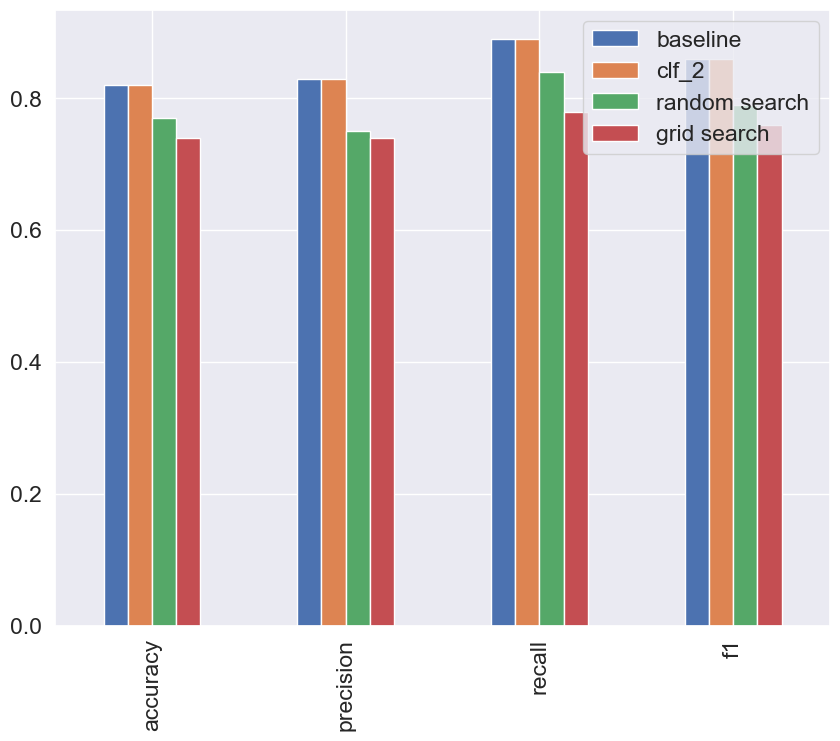

In [420]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10 ,8));

# 6. Save and Load a trained model

Two ways to save and load
1. Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [423]:
import pickle

pickle.dump(gs_clf, open("gs_random_forest_model.pkl", "wb"))

In [425]:
# load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl", "rb"))

In [426]:
np.random.seed(42)

# split
X = heart_shuffled.drop("target", axis=1)
y = heart_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# run the model
pickle_y_preds = loaded_pickle_model.predict(X_test)


evaluate_preds(y_test, pickle_y_preds)

Accuracy: 73.77%
Precision: 0.74
Recall: 0.78%
F1 score: 0.76%


{'accuracy': 0.74, 'precision': 0.74, 'recall': 0.78, 'f1': 0.76}

In [427]:
gs_metrics

{'accuracy': 0.74, 'precision': 0.74, 'recall': 0.78, 'f1': 0.76}

**joblib**

In [429]:
from joblib import dump, load

dump(gs_clf, filename="gs_random_forest_model.joblib")

['gs_random_forest_model.joblib']

In [430]:
# import the model
loaded_joblib_model = load(filename="gs_random_forest_model.joblib")

In [431]:
joblib_y_preds = loaded_joblib_model.predict(X_test)

evaluate_preds(y_test, joblib_y_preds)

Accuracy: 73.77%
Precision: 0.74
Recall: 0.78%
F1 score: 0.76%


{'accuracy': 0.74, 'precision': 0.74, 'recall': 0.78, 'f1': 0.76}

In [432]:
gs_metrics

{'accuracy': 0.74, 'precision': 0.74, 'recall': 0.78, 'f1': 0.76}

### Which to use?

joblib is more efficient on objects that carry large numpy arrays